In [1]:
import cv2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
img = cv2.imread('image.jpg')

In [7]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

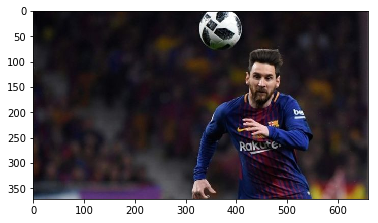

In [8]:

plt.imshow(img)

In [9]:
img_cpy = img 

In [10]:
img_cpy = cv2.cvtColor(img_cpy,cv2.COLOR_BGR2GRAY)

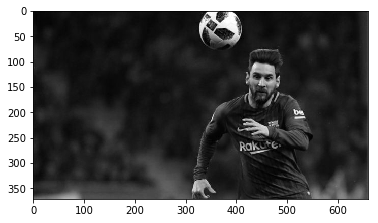

In [12]:
plt.imshow(img_cpy,cmap='gray')

In [24]:
print (img_cpy.shape)
type(img_cpy)

(371, 660)


numpy.ndarray

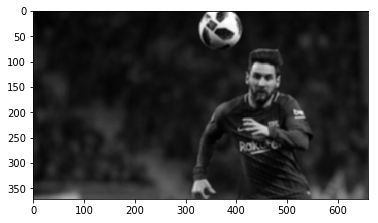

In [14]:
blur = cv2.GaussianBlur(img_cpy,(5,5),150)
plt.imshow(blur,cmap='gray')

In [74]:
blur = np.float32(blur)
img_cpy = np.float32(img_cpy)

f_blur = np.fft.fft2(blur)
fshift_blur = np.fft.fftshift(f_blur)

f_img = np.fft.fft2(img_cpy)
fshift_img = np.fft.fftshift(f_img)


In [75]:
print(type(f))
print(type(fshift))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
log_blur = np.log(fshift_blur)
log_img = np.log(fshift_img)

In [100]:


f_ishift = np.fft.ifftshift(fshift_img)
img_back = np.fft.ifft2(f_ishift)
#img_back = (255.0*img_back)/(np.argmax(np.argmax(img_back)))
img_back = np.int8(img_back)
#img_back = (255.0*img_back)/(np.argmax(np.argmax(img_back)))
#img_back = img_back.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [102]:
# OUT(:,:,1)=uint8(255*RR/(max(max([RR RG RB]))));

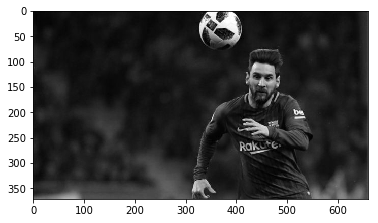

In [107]:
plt.imshow(img_cpy,cmap='gray')

## Working Single Scale Retinex 

## Above code can't use fourier transform for gaussian blur

In [119]:
retinex = np.log10(img_cpy) - np.log10(cv2.GaussianBlur(img_cpy, (0,0), 80))


In [120]:
retinex

array([[ 0.40242207, -0.17160869, -0.17160618, ...,  0.23833561,
         0.12024486,  0.39324915],
       [ 0.40241015, -0.17162013, -0.17161763, ...,  0.24854934,
         0.13360333,  0.40042222],
       [ 0.40237594, -0.17165458, -0.20944035, ...,  0.25851583,
         0.15913987,  0.41441548],
       ...,
       [ 0.37425518,  0.28374422,  0.31440246, ...,  0.15015674,
         0.07814384,  0.21188831],
       [ 0.4112954 ,  0.3289404 ,  0.35215938, ...,  0.15012515,
         0.07093346,  0.20659244],
       [ 0.44177377,  0.36552334,  0.39106703, ...,  0.1501143 ,
         0.07092285,  0.20658183]], dtype=float32)

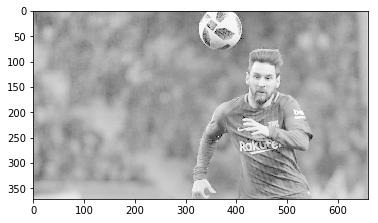

In [121]:
plt.imshow(retinex,cmap='gray')

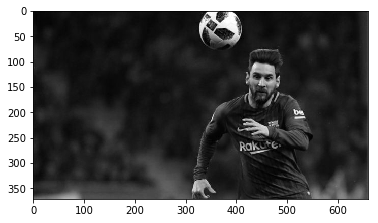

In [123]:
plt.imshow(img_cpy,cmap = 'gray')

In [124]:
log_img = np.log(img_cpy)

In [132]:
img_cpy = np.float32(img_cpy)
f_blur = np.fft.fft2(img_cpy)
fshift_blur = np.fft.fftshift(f_blur)


In [135]:
print(fshift_blur)

[[ -76.14337   +26.027151j  207.39088   -52.676968j
   -61.553944 +131.36565j  ...  -46.03232  -122.697815j
  -123.25654  -141.20581j   125.99389   -22.174463j]
 [  93.826416  +20.482992j  -65.36369  -129.26915j
  -185.42781  +111.03633j  ...  347.13678  -298.91556j
  -174.037    +547.38696j     3.0016222-293.7148j  ]
 [ 160.55704  +274.07993j  -312.36194  -100.997536j
   130.68266   -17.287546j ...  249.06857  -189.34058j
  -333.89844   +76.54344j   151.82954  -229.32806j ]
 ...
 [ 160.55705  -274.07974j   151.82954  +229.32806j
  -333.89844   -76.54344j  ...   99.05096  -169.18663j
   130.68266   +17.287546j -312.36194  +100.997536j]
 [  93.826355  -20.483055j    3.0016222+293.7148j
  -174.037    -547.38696j  ...   38.128735  +11.932909j
  -185.42781  -111.03633j   -65.36369  +129.26915j ]
 [ -76.14346   -26.027296j  125.99389   +22.174463j
  -123.25654  +141.20581j  ...   73.0664   +179.53262j
   -61.553944 -131.36565j   207.39088   +52.676968j]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [136]:

gauss = cv2.GaussianBlur(fshift_blur,(0,0),80)


error: OpenCV(3.4.4) C:\projects\opencv-python\opencv\modules\imgproc\src\filter.cpp:3644: error: (-213:The function/feature is not implemented) Unsupported combination of source format (=1), and buffer format (=5) in function 'cv::getLinearRowFilter'


In [ ]:

f_ishift = np.fft.ifftshift(gauss)
img_back = np.fft.ifft2(f_ishift)